In [2]:
import os
print(os.listdir('fer2013'))

FileNotFoundError: [Errno 2] No such file or directory: 'fer2013'

In [ ]:
train_path = 'fer2013/train'
val_path = 'fer2013/test'

In [ ]:
import matplotlib.pyplot as plt
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]

    plt.figure(figsize=(10, 10))

    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)

        img = plt.imread(img_path)
        plt.tight_layout()
        plt.imshow(img, cmap='gray')

In [ ]:
plot_images(train_path+'/angry')

NameError: name 'plot_images' is not defined

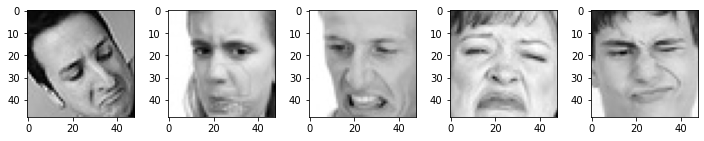

In [ ]:
plot_images(train_path+'/disgust')

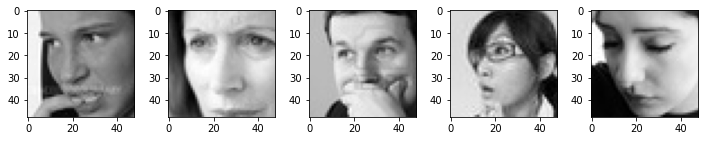

In [ ]:
plot_images(train_path+'/fear')

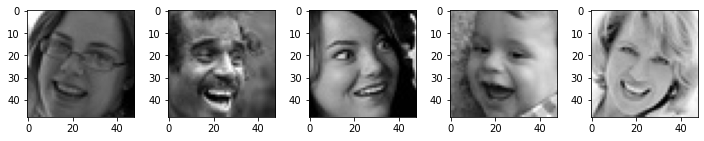

In [ ]:
plot_images(train_path+'/happy')

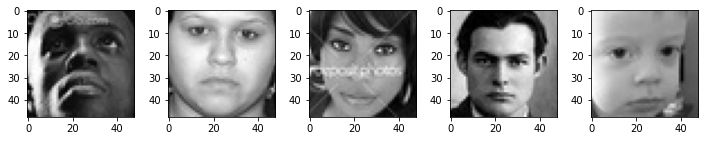

In [ ]:
plot_images(train_path+'/neutral')

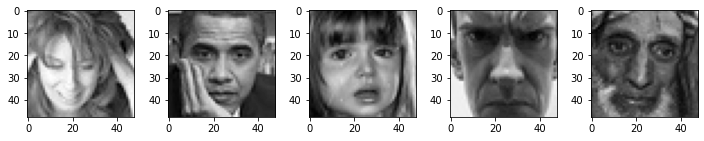

In [ ]:
plot_images(train_path+'/sad')

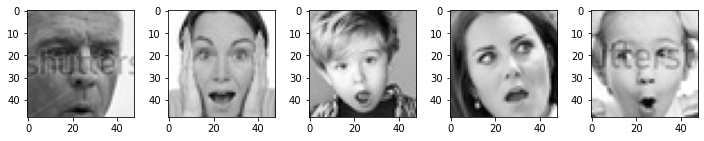

In [ ]:
plot_images(train_path+'/surprise')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers

In [ ]:
emotion_labels = sorted(os.listdir(train_path))
print(emotion_labels)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
batch_size = 64
target_size = (48,48)

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

val_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
input_shape = (48,48,1) # img_rows, img_colums, color_channels
num_classes = 7

In [ ]:
# Build Model
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape)) #, data_format='channels_last', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                    

In [ ]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 100
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VAL   = val_generator.n//val_generator.batch_size

In [ ]:
# Train Model
history = model.fit(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs, verbose=1, validation_data=val_generator, validation_steps=STEP_SIZE_VAL)

Epoch 1/100
448/448 [==============================] - 604s 1s/step - loss: 1.7459 - accuracy: 0.2900 - val_loss: 1.5458 - val_accuracy: 0.4011
Epoch 2/100
448/448 [==============================] - 498s 1s/step - loss: 1.4650 - accuracy: 0.4315 - val_loss: 1.3687 - val_accuracy: 0.4754
Epoch 3/100
448/448 [==============================] - 518s 1s/step - loss: 1.3028 - accuracy: 0.5006 - val_loss: 1.2807 - val_accuracy: 0.5084
Epoch 4/100
448/448 [==============================] - 508s 1s/step - loss: 1.1630 - accuracy: 0.5577 - val_loss: 1.1873 - val_accuracy: 0.5490
Epoch 5/100
448/448 [==============================] - 512s 1s/step - loss: 1.0349 - accuracy: 0.6108 - val_loss: 1.1647 - val_accuracy: 0.5638
Epoch 6/100
448/448 [==============================] - 535s 1s/step - loss: 0.8948 - accuracy: 0.6683 - val_loss: 1.1976 - val_accuracy: 0.5658
Epoch 7/100
448/448 [==============================] - 539s 1s/step - loss: 0.7327 - accuracy: 0.7292 - val_loss: 1.2896 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
# Save Model
models.save_model(model, 'fer2013_cnn.h5')

In [ ]:
# Evaluate Model
score = model.evaluate_generator(val_generator, steps=STEP_SIZE_VAL)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

In [ ]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test):
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')